In [1]:
import pandas as pd
import matplotlib.pyplot as plt




In [133]:
# Load CSV file
file_path = "C:\\Users\\krits\\vscodeWorkspaces\\Jupyter_Notebook\\LSTM_Model\\CSV_SIGNAL\\CSV_2\\20250319_280_380V_10A_1.csv"  # Change this to your actual file path
df = pd.read_csv(file_path, parse_dates=['DateTime'])
df_for_save = pd.read_csv(file_path, parse_dates=['DateTime'])
# Set DateTime as index for better plotting
df.set_index("DateTime", inplace=True)

# Display first few rows
# print(df.head())

# Basic statistics
# print(df.describe())

In [134]:
df

,Name,HV_SwitchingFreq_Rail1,VS_Bulk_HvDc,CS_Shunt_HVDC_R1,HV_OutPwr,VS_Vout_Sense_HVDC,MainsRMSCurrent,MainsRMSVoltage,Unnamed: 9
DateTime,,,,,,,,,
2025-03-19 18:53:02,280_380V_10A_1,197,687.5,9.99,2895.0,289.5,4.5,218.5,NaN
2025-03-19 18:53:04,280_380V_10A_1,197,687.7,10.00,2892.0,289.5,4.5,219.0,NaN
2025-03-19 18:53:04,280_380V_10A_1,198,687.5,9.99,2895.0,289.5,4.6,219.0,NaN
2025-03-19 18:53:05,280_380V_10A_1,197,687.9,9.99,2895.0,289.5,4.5,218.5,NaN
2025-03-19 18:53:06,280_380V_10A_1,197,686.9,10.00,2892.0,289.5,4.5,218.5,NaN
...,...,...,...,...,...,...,...,...,...
2025-03-19 18:54:39,280_380V_10A_1,233,702.1,9.99,2795.0,279.5,4.4,218.5,NaN
2025-03-19 18:54:40,280_380V_10A_1,232,702.4,10.00,2792.0,279.6,4.4,219.0,NaN
2025-03-19 18:54:40,280_380V_10A_1,232,701.7,9.99,2795.0,279.5,4.4,218.5,NaN


In [135]:
df.drop(columns=["Name", "Unnamed: 9"], inplace=True)
df_for_save.drop(columns=["Name", "Unnamed: 9"], inplace=True)

In [136]:
df.drop(df.index[-1], inplace=True)
df_for_save.drop(df_for_save.index[-1], inplace=True)

In [137]:
df

,HV_SwitchingFreq_Rail1,VS_Bulk_HvDc,CS_Shunt_HVDC_R1,HV_OutPwr,VS_Vout_Sense_HVDC,MainsRMSCurrent,MainsRMSVoltage
DateTime,,,,,,,
2025-03-19 18:53:02,197,687.5,9.99,2895.0,289.5,4.5,218.5
2025-03-19 18:53:04,197,687.7,10.00,2892.0,289.5,4.5,219.0
2025-03-19 18:53:04,198,687.5,9.99,2895.0,289.5,4.6,219.0
2025-03-19 18:53:05,197,687.9,9.99,2895.0,289.5,4.5,218.5
2025-03-19 18:53:06,197,686.9,10.00,2892.0,289.5,4.5,218.5
...,...,...,...,...,...,...,...
2025-03-19 18:54:39,232,702.5,10.00,2792.0,279.5,4.4,218.5
2025-03-19 18:54:39,233,702.1,9.99,2795.0,279.5,4.4,218.5
2025-03-19 18:54:40,232,702.4,10.00,2792.0,279.6,4.4,219.0


In [138]:
df_for_save

,DateTime,HV_SwitchingFreq_Rail1,VS_Bulk_HvDc,CS_Shunt_HVDC_R1,HV_OutPwr,VS_Vout_Sense_HVDC,MainsRMSCurrent,MainsRMSVoltage
0,2025-03-19 18:53:02,197,687.5,9.99,2895.0,289.5,4.5,218.5
1,2025-03-19 18:53:04,197,687.7,10.00,2892.0,289.5,4.5,219.0
2,2025-03-19 18:53:04,198,687.5,9.99,2895.0,289.5,4.6,219.0
3,2025-03-19 18:53:05,197,687.9,9.99,2895.0,289.5,4.5,218.5
4,2025-03-19 18:53:06,197,686.9,10.00,2892.0,289.5,4.5,218.5
...,...,...,...,...,...,...,...,...
168,2025-03-19 18:54:39,232,702.5,10.00,2792.0,279.5,4.4,218.5
169,2025-03-19 18:54:39,233,702.1,9.99,2795.0,279.5,4.4,218.5
170,2025-03-19 18:54:40,232,702.4,10.00,2792.0,279.6,4.4,219.0
171,2025-03-19 18:54:40,232,701.7,9.99,2795.0,279.5,4.4,218.5


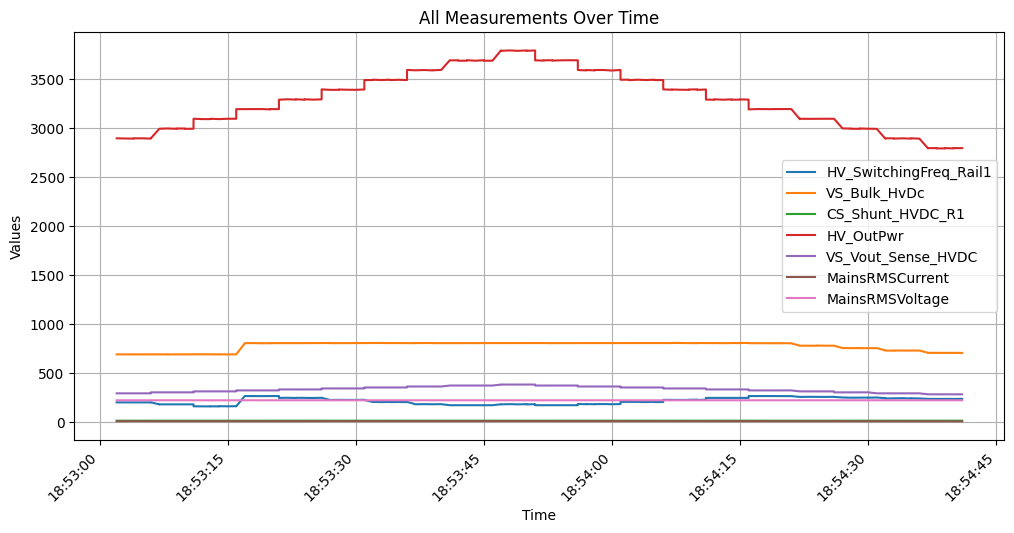

In [139]:
# Plot all numerical columns
df.plot(figsize=(12, 6), marker='', linestyle='-')
plt.xlabel("Time")
plt.ylabel("Values")
plt.title("All Measurements Over Time")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid()
plt.show()

In [151]:
df_for_save['DateTime'][len(df_for_save)-1]

Timestamp('2025-03-19 18:54:41')

In [152]:
import numpy as np
import pandas as pd

# Assuming df is already defined and the 'DateTime' column is in datetime format

# 2. Get the number of rows in the DataFrame
num_rows = len(df_for_save)

# 1. Calculate the total time difference in seconds between the first and last DateTime
time_diff_seconds = (df_for_save['DateTime'][num_rows - 1] - df_for_save['DateTime'][0]).total_seconds()
print(f"Diff time {time_diff_seconds}")


# 3. Generate the line using np.linspace
line = np.linspace(0, time_diff_seconds, num_rows)

# 4. Append the generated line as a new column to the DataFrame
df_for_save['TimeLine'] = line

# Display the updated DataFrame
print(df_for_save.head())


Diff time 99.0
             DateTime  HV_SwitchingFreq_Rail1  VS_Bulk_HvDc  CS_Shunt_HVDC_R1  \
0 2025-03-19 18:53:02                     197         687.5              9.99   
1 2025-03-19 18:53:04                     197         687.7             10.00   
2 2025-03-19 18:53:04                     198         687.5              9.99   
3 2025-03-19 18:53:05                     197         687.9              9.99   
4 2025-03-19 18:53:06                     197         686.9             10.00   

   HV_OutPwr  VS_Vout_Sense_HVDC  MainsRMSCurrent  MainsRMSVoltage  TimeLine  
0     2895.0               289.5              4.5            218.5  0.000000  
1     2892.0               289.5              4.5            219.0  0.575581  
2     2895.0               289.5              4.6            219.0  1.151163  
3     2895.0               289.5              4.5            218.5  1.726744  
4     2892.0               289.5              4.5            218.5  2.302326  


In [153]:
df_for_save

,DateTime,HV_SwitchingFreq_Rail1,VS_Bulk_HvDc,CS_Shunt_HVDC_R1,HV_OutPwr,VS_Vout_Sense_HVDC,MainsRMSCurrent,MainsRMSVoltage,TimeLine
0,2025-03-19 18:53:02,197,687.5,9.99,2895.0,289.5,4.5,218.5,0.000000
1,2025-03-19 18:53:04,197,687.7,10.00,2892.0,289.5,4.5,219.0,0.575581
2,2025-03-19 18:53:04,198,687.5,9.99,2895.0,289.5,4.6,219.0,1.151163
3,2025-03-19 18:53:05,197,687.9,9.99,2895.0,289.5,4.5,218.5,1.726744
4,2025-03-19 18:53:06,197,686.9,10.00,2892.0,289.5,4.5,218.5,2.302326
...,...,...,...,...,...,...,...,...,...
168,2025-03-19 18:54:39,232,702.5,10.00,2792.0,279.5,4.4,218.5,96.697674
169,2025-03-19 18:54:39,233,702.1,9.99,2795.0,279.5,4.4,218.5,97.273256
170,2025-03-19 18:54:40,232,702.4,10.00,2792.0,279.6,4.4,219.0,97.848837
171,2025-03-19 18:54:40,232,701.7,9.99,2795.0,279.5,4.4,218.5,98.424419


In [ ]:
# Remove the 'DateTime' column (it is now the index)
# df.reset_index(drop=True, inplace=True)

In [154]:
# Reorder columns to make 'TimeLine' the first column
cols = ['TimeLine'] + [col for col in df_for_save.columns if col != 'TimeLine']
df_for_save = df_for_save[cols]

# Display the updated DataFrame
print(df_for_save.head())

   TimeLine            DateTime  HV_SwitchingFreq_Rail1  VS_Bulk_HvDc  \
0  0.000000 2025-03-19 18:53:02                     197         687.5   
1  0.575581 2025-03-19 18:53:04                     197         687.7   
2  1.151163 2025-03-19 18:53:04                     198         687.5   
3  1.726744 2025-03-19 18:53:05                     197         687.9   
4  2.302326 2025-03-19 18:53:06                     197         686.9   

   CS_Shunt_HVDC_R1  HV_OutPwr  VS_Vout_Sense_HVDC  MainsRMSCurrent  \
0              9.99     2895.0               289.5              4.5   
1             10.00     2892.0               289.5              4.5   
2              9.99     2895.0               289.5              4.6   
3              9.99     2895.0               289.5              4.5   
4             10.00     2892.0               289.5              4.5   

   MainsRMSVoltage  
0            218.5  
1            219.0  
2            219.0  
3            218.5  
4            218.5  


In [155]:
df_for_save

,TimeLine,DateTime,HV_SwitchingFreq_Rail1,VS_Bulk_HvDc,CS_Shunt_HVDC_R1,HV_OutPwr,VS_Vout_Sense_HVDC,MainsRMSCurrent,MainsRMSVoltage
0,0.000000,2025-03-19 18:53:02,197,687.5,9.99,2895.0,289.5,4.5,218.5
1,0.575581,2025-03-19 18:53:04,197,687.7,10.00,2892.0,289.5,4.5,219.0
2,1.151163,2025-03-19 18:53:04,198,687.5,9.99,2895.0,289.5,4.6,219.0
3,1.726744,2025-03-19 18:53:05,197,687.9,9.99,2895.0,289.5,4.5,218.5
4,2.302326,2025-03-19 18:53:06,197,686.9,10.00,2892.0,289.5,4.5,218.5
...,...,...,...,...,...,...,...,...,...
168,96.697674,2025-03-19 18:54:39,232,702.5,10.00,2792.0,279.5,4.4,218.5
169,97.273256,2025-03-19 18:54:39,233,702.1,9.99,2795.0,279.5,4.4,218.5
170,97.848837,2025-03-19 18:54:40,232,702.4,10.00,2792.0,279.6,4.4,219.0
171,98.424419,2025-03-19 18:54:40,232,701.7,9.99,2795.0,279.5,4.4,218.5


In [156]:
df_for_save.drop(columns="DateTime", inplace=True)

C:\Users\krits\AppData\Local\Temp\ipykernel_28536\1144685524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_save.drop(columns="DateTime", inplace=True)


In [160]:
df_for_save.reset_index(drop=True, inplace=True)

In [161]:
df_for_save

,TimeLine,HV_SwitchingFreq_Rail1,VS_Bulk_HvDc,CS_Shunt_HVDC_R1,HV_OutPwr,VS_Vout_Sense_HVDC,MainsRMSCurrent,MainsRMSVoltage
0,0.000000,197,687.5,9.99,2895.0,289.5,4.5,218.5
1,0.575581,197,687.7,10.00,2892.0,289.5,4.5,219.0
2,1.151163,198,687.5,9.99,2895.0,289.5,4.6,219.0
3,1.726744,197,687.9,9.99,2895.0,289.5,4.5,218.5
4,2.302326,197,686.9,10.00,2892.0,289.5,4.5,218.5
...,...,...,...,...,...,...,...,...
168,96.697674,232,702.5,10.00,2792.0,279.5,4.4,218.5
169,97.273256,233,702.1,9.99,2795.0,279.5,4.4,218.5
170,97.848837,232,702.4,10.00,2792.0,279.6,4.4,219.0
171,98.424419,232,701.7,9.99,2795.0,279.5,4.4,218.5


In [162]:
filepath = "Test.csv"
df_for_save.to_csv(filepath)  